In [ ]:
#!pip3 install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [1]:
import json
from pathlib import Path

In [2]:
# replace this by your data path...
DATA_PATH = Path('/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces')

In [3]:
path = DATA_PATH / 'style_transfers'

In [4]:
path2 = DATA_PATH / 'style_transfers_2/style_transfers_2'

## TODO
* Sort by style / content loss
* epoch is wrong for slicing across experiments (different progress per experiment)
* PRECOMPUTE values for interactives... plt.imshow()??

In [5]:
#quick reshaping, because I did it badly yesterday 
#this won't be needed in next run -- data will be saved in a nicer format for viz

temp = {
    "params": [],
    "images": {},
}
for experiment_dir in path2.iterdir():
    style_injects = experiment_dir.name.split("-")[1:]
    style_injects_key = "-".join(style_injects)
    temp["images"][style_injects_key] = {}
    for elem in experiment_dir.iterdir():
        if elem.suffix == ".json":
            with open(elem) as f:
                d = json.load(f)
                d["style_injects"] = style_injects
                temp["params"].append(d)
        else:
            #print("hi", elem)
            epoch = str(elem.name).split("_")[0]
            temp["images"][style_injects_key][epoch] = elem 
            

In [6]:
def get_images_for_config(config, temp):
    return sorted({int(k): v for k, v in temp["images"]["-".join(config["style_injects"])].items()}.items())

In [7]:
from PIL import Image as P_Image
#interactive widgets:
#https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6|

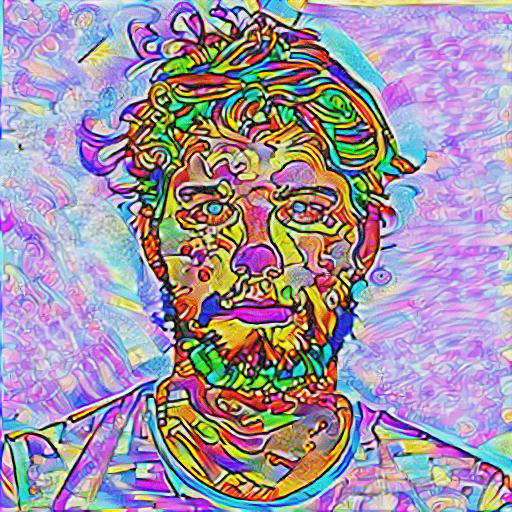

In [8]:
#plt.imshow(images[0])

P_Image.open(path2 / "try-1-2-3-5-8-9-10-11-13-14-15/450_SL_1528_CL_2298")

In [18]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt

def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i])
        #plt.imshow(images[2])

        #plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))

In [52]:
def open_image(img_file):
    temp = P_Image.open(img_file)
    img = temp.copy()
    temp.close()
    return img

all_images = [
    [open_image(img) for epoch, img in get_images_for_config(conf, temp)]
    for conf in temp["params"][:10]
]
len(all_images), len(all_images[0])

(10, 11)

In [53]:
fims = [imgs for imgs in all_images if len(imgs) == 11]
len(fims)

10

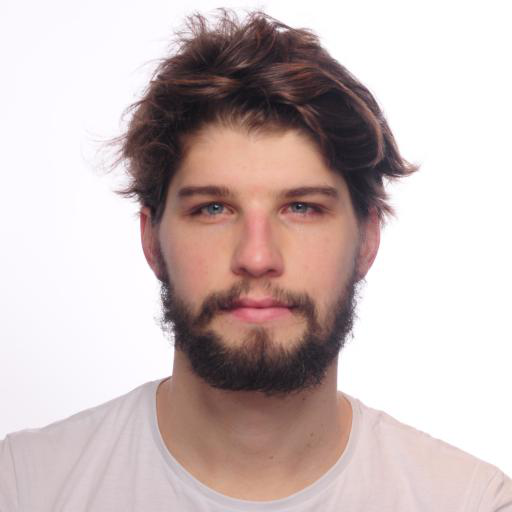

In [54]:
all_images[0][0]

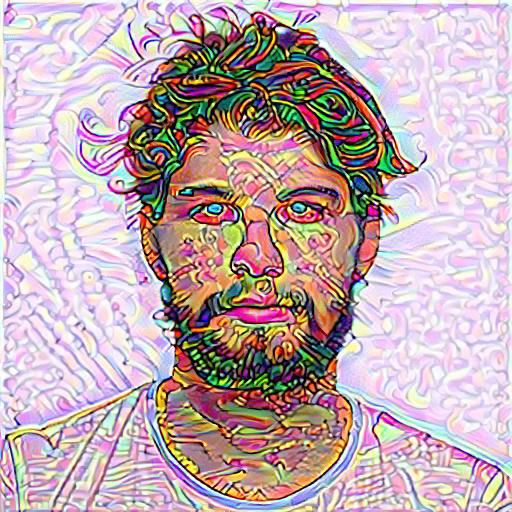

In [55]:
all_images[0][4]

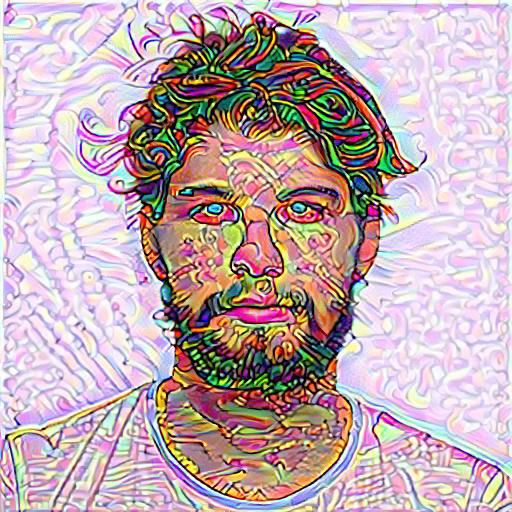

In [56]:
all_images[0][4]

In [57]:
import numpy as np
images0 = [np.array(img) for img in all_images[0]]

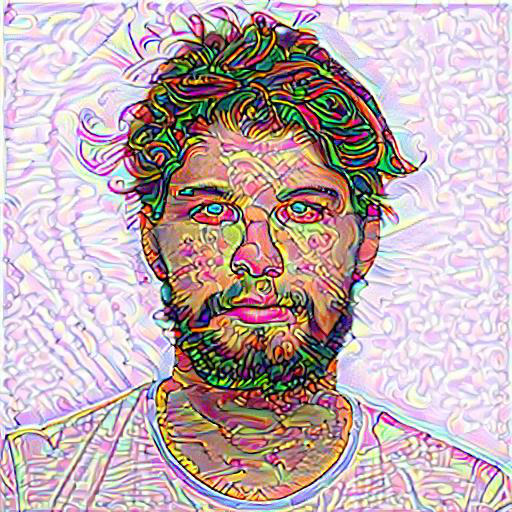

In [58]:
all_images[0][3]

In [59]:
browse_images(all_images[0])

interactive(children=(IntSlider(value=5, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [60]:
all_images[0][0].size

(512, 512)

In [61]:
def precompute_plot(all_imgs):
    return [
        [
            plt.imshow(img, animated=True)
            for img in imgs
        ]
        for imgs in all_imgs        
    ]



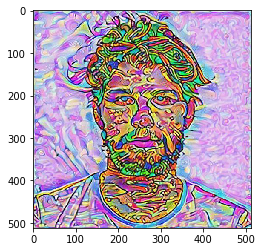

In [62]:
ims = precompute_plot(fims)

In [77]:
import os
from IPython.display import Image


def resize_all(all_imgs, size=(128, 128)):
    return [
        [img.resize(size) for img in imgs]
        for imgs in all_imgs
    ]


def browse_all(all_imgs, columns = 4):
    n = len(all_imgs[0]) #7
    def view_images(epoch):
        fig=plt.figure(figsize=(25, 13))
        w=100
        h=50
        #fig, axs = plt.subplots(rows, columns)
        #axs[0, 0].plot(x, y)
        experiment_slices = [imgs[epoch] for imgs in all_imgs]
        rows = np.ceil(len(experiment_slices) / columns)
        for i, es in enumerate(experiment_slices):
             #[[ ]]
            fig.add_subplot(rows, columns, i + 1)
            plt.imshow(es)
        plt.show()
    interact(view_images, epoch=(0,n-1))
        
'''
        w=20
h=20
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = [P_Image.open(img) for epoch, img in outputs]get_images_for_config(conf, temp)
        np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

'''


'\n        w=20\nh=20\nfig=plt.figure(figsize=(8, 8))\ncolumns = 4\nrows = 4\nfor i in range(1, columns*rows +1):\n    img = [P_Image.open(img) for epoch, img in outputs]get_images_for_config(conf, temp)\n        np.random.randint(10, size=(h,w))\n    fig.add_subplot(rows, columns, i)\n    plt.imshow(img)\nplt.show()\n\n'

In [79]:
browse_all(resize_all(fims, (32, 32)))

interactive(children=(IntSlider(value=5, description='epoch', max=10), Output()), _dom_classes=('widget-intera…

In [70]:
fdir = path / 'try-0-1-3-5-6-7-8-9-10-11-12-14-15/'
import os
from IPython.display import Image
@interact
def show_images(file=os.listdir(fdir)):
    print(file.split(".")[-1])
    if(file.split(".")[-1] != "json"):
        print("yaa")
        display(Image(fdir/file))
        return
    else:
        print("yoo", file)


interactive(children=(Dropdown(description='file', options=('50_SL_22092_CL_476', '100_SL_10718_CL_484', 'conf…

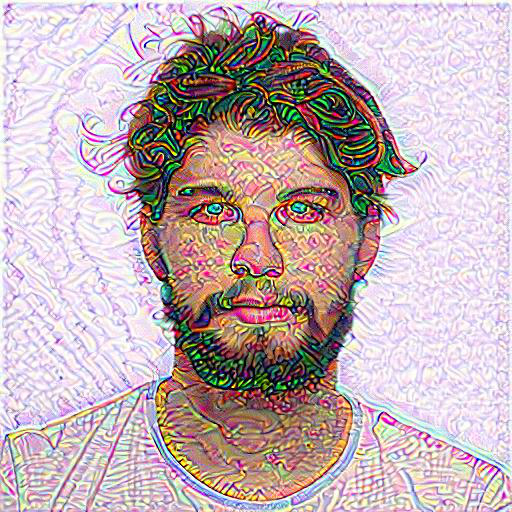

In [82]:
images[1]